# Solar Data Discovery / SIERRALEONE: Week 0 Challenge 
Data Profiling, Cleaning, and Exploratory Data Analysis (EDA)

1. importing  Necessary packages



In [10]:
# import necessary Packages ...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2. Importing Data 

In [11]:
file_path = "E:/Tenx/data/sierraleone-bumbuna.csv"
df = pd.read_csv(file_path)

# Show first few rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_flag
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,False
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False


3. Statistics Summary & Missing Values analysis

In [12]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,0.0
mean,185.000024,104.128943,108.104278,189.764194,181.693908,26.214248,79.747674,1.089871,1.614397,0.352298,130.947234,6.962560,999.873395,0.000997,0.004159,31.959657,32.087075,NaN
std,279.019460,200.954182,153.691835,281.888942,269.988109,4.397260,20.556188,1.155220,1.503353,0.283730,114.365092,7.455692,2.106966,0.031566,0.040205,12.029241,11.666626,NaN
min,-15.900000,-7.800000,-16.700000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-3.300000,-0.300000,-4.100000,0.000000,0.000000,23.100000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.400000,23.700000,NaN
50%,-0.400000,-0.100000,-0.600000,1.200000,1.100000,25.100000,86.100000,0.800000,1.400000,0.400000,156.200000,5.800000,1000.000000,0.000000,0.000000,26.300000,26.500000,NaN
75%,331.300000,74.800000,217.900000,327.200000,314.500000,29.200000,97.000000,1.900000,2.600000,0.500000,232.800000,11.800000,1001.000000,0.000000,0.000000,39.600000,40.000000,NaN
max,1097.000000,772.300000,590.500000,1105.000000,1064.000000,39.900000,100.000000,4.800000,6.400000,2.500000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.200000,70.000000,NaN


In [13]:
# Missing values report
df.isna().sum().sort_values(ascending=False)

Comments         509308
Timestamp             0
DNI                   0
GHI                   0
DHI                   0
ModA                  0
Tamb                  0
ModB                  0
WS                    0
WSgust                0
WSstdev               0
RH                    0
WD                    0
WDstdev               0
Cleaning              0
BP                    0
Precipitation         0
TModA                 0
TModB                 0
outlier_flag          0
dtype: int64

4. Outlier Detection with Z-Scores

In [14]:
from scipy.stats import zscore

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(zscore)

# Flag outliers
outliers = (z_scores.abs() > 3)
df['outlier_flag'] = outliers.any(axis=1)

# Check how many outliers
df['outlier_flag'].value_counts()

# Recommended: Drop outlier rows to create a clean dataset; 
# Since your outliers are less than 2%, and you're preparing this data for EDA and regional comparison:
df_cleaned = df[~df['outlier_flag']].copy()

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('E:/Tenx/data/sierraleone_clean.csv', index=False)

# Optional: Preview the cleaned data
print("Cleaned dataset shape:", df_cleaned.shape)

df= df_cleaned

Cleaned dataset shape: (497012, 20)


6. Correlation and Scatter Plots

<Axes: >

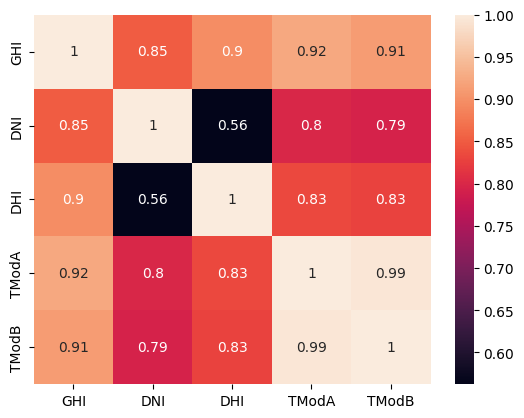

In [15]:

# Heatmap
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True)